In this tutorial, we will implement the 2D version of Gaussian Splatting, which means every single gaussian primitive are no longer 3D or 1D, but 2D gaussian, and the final outputs from the render are still 1D; please see the readme under this folder, and please note our 2D gaussian splatting is not like 2D gaussian splatting paper!

---

We will finish the job by implementing three different parts of Gaussian Splatitng
- Gaussians Initalizater;
- Forward Gaussian Splatting Render;
- Training Pipeline for 2D Gaussian Spltting;

In [2]:
# Import the necessary modules
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from dataclasses import dataclass

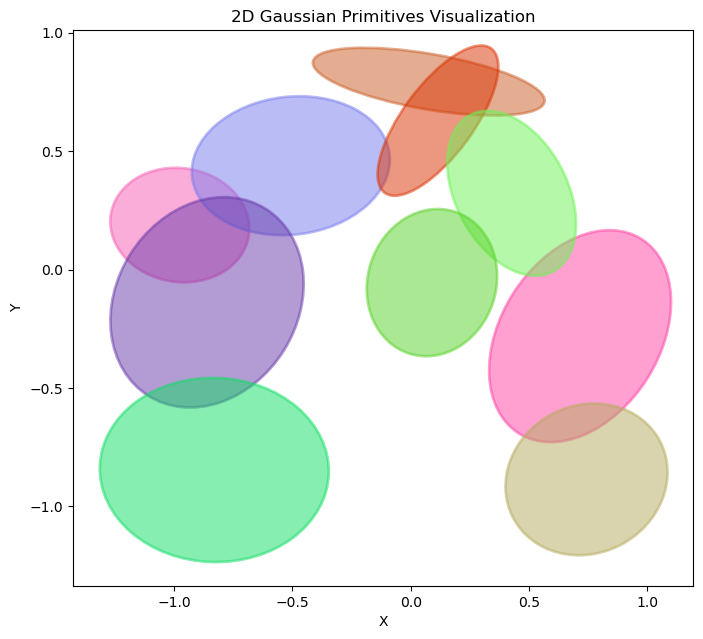

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def get_cov_ellipse(mean, scale, rotation, num_std=2, color=None, alpha=0.5):
    """
    返回matplotlib.patches.Ellipse对象, 表示高斯分布的等高线
    """
    from matplotlib.patches import Ellipse

    width, height = scale[0] * num_std * 2, scale[1] * num_std * 2
    angle = np.degrees(rotation)
    if color is not None:
        color = color.clip(0, 1)
    else:
        color = [0, 0, 1]
    return Ellipse(
        xy=mean, width=width, height=height, angle=angle,
        edgecolor=color, facecolor=color, lw=2, alpha=alpha
    )

class GaussianModel:
    def __init__(self, num_gaussians: int, sh_degree: int = 3, device: str = 'cpu'):
        self.num_gaussians = num_gaussians
        self.sh_degree = sh_degree
        self.device = device
        self.init_gaussians()

    def init_gaussians(self):
        self.means = torch.rand(self.num_gaussians, 2, device=self.device) * 2 - 1
        self.scales = torch.rand(self.num_gaussians, 2, device=self.device) * 0.2 + 0.05  # 更合理的尺度
        self.rotations = torch.rand(self.num_gaussians, 1, device=self.device) * 2 * torch.pi
        self.opacity = torch.rand(self.num_gaussians, 1, device=self.device)
        self.colors = torch.rand(self.num_gaussians, 3, device=self.device)

    def visualize_gaussians(self, num_std=2):
        """
        可视化当前所有2D高斯分布, 每个高斯用填充椭圆表示。
        """
        fig, ax = plt.subplots(figsize=(8, 8))
        all_x, all_y = [], []
        for i in range(self.num_gaussians):
            mean = self.means[i].detach().cpu().numpy()
            scale = self.scales[i].detach().cpu().numpy()
            rotation = self.rotations[i].detach().cpu().numpy()[0]
            color = self.colors[i].detach().cpu().numpy()

            ellipse = get_cov_ellipse(mean, scale, rotation, num_std=num_std, color=color, alpha=0.5)
            ax.add_patch(ellipse)

            # 记录所有椭圆的边界用于自适应坐标轴
            all_x.extend([mean[0] - scale[0]*num_std, mean[0] + scale[0]*num_std])
            all_y.extend([mean[1] - scale[1]*num_std, mean[1] + scale[1]*num_std])

        # 自动调整坐标轴范围，确保所有椭圆完整显示
        margin = 0.1
        x_min, x_max = min(all_x) - margin, max(all_x) + margin
        y_min, y_max = min(all_y) - margin, max(all_y) + margin
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('2D Gaussian Primitives Visualization')
        plt.show()

    def project_gaussians(self, )

if __name__ == "__main__":
    num_gaussians = 10
    gaussian_model = GaussianModel(num_gaussians)
    gaussian_model.visualize_gaussians()